# Aim of this notebook
The goal of this note book is to automate the FAIR assesment of mutliple online resources through the [FAIR-Checker tool](https://fair-checker.france-bioinformatique.fr). 
All resulst are stored in a matrix and serialized into a CSV file. Scores can be interpreted as follows: 
 - 0 -> `failure`
 - 1 -> `weak` assesment
 - 2 -> `strong` assesment

To run this notebook you just need the `requests` and `pandas` python libraries. 

The FAIR-Checker API is better described at https://fair-checker.france-bioinformatique.fr/swagger 

Please report any issue at https://github.com/IFB-ElixirFr/fair-checker/issues or contact alban.gaignard@univ-nantes.fr. 

In [1]:
import requests
import pandas as pd

## Input dataset

In [2]:
urls = ["http://bio.tools/bwa",
        "https://workflowhub.eu/workflows/447",
        "https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HYPW4B", 
        "https://tess.elixir-europe.org/materials/discover-drug-targets-with-europe-pmc-machine-learning-dataset-and-open-targets"
       ]

In [3]:
FC_all_metrics_url = "https://fair-checker.france-bioinformatique.fr/api/check/metrics_all"

## FAIR assesment over all inputs 

In [4]:
df = pd.DataFrame()
rows = []
for u in urls:
    # call to the FC API
    res = requests.get(url=FC_all_metrics_url, params={"url": u})
    evaluations = res.json()
    row = {"URL": u}    
    # iterating over all evaluation results
    for e in evaluations:
        row[e["metric"]] = int(e["score"])
    print(row)
    rows.append(row)

{'URL': 'http://bio.tools/bwa', 'F1A': 2, 'F1B': 2, 'F2A': 2, 'F2B': 1, 'A1.1': 2, 'I1': 2, 'I2': 1, 'I3': 2, 'R1.1': 0, 'R1.2': 0, 'R1.3': 1}
{'URL': 'https://workflowhub.eu/workflows/447', 'F1A': 2, 'F1B': 2, 'F2A': 2, 'F2B': 1, 'A1.1': 2, 'I1': 2, 'I2': 1, 'I3': 2, 'R1.1': 2, 'R1.2': 0, 'R1.3': 1}
{'URL': 'https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HYPW4B', 'F1A': 2, 'F1B': 2, 'F2A': 2, 'F2B': 2, 'A1.1': 2, 'I1': 2, 'I2': 2, 'I3': 2, 'R1.1': 2, 'R1.2': 0, 'R1.3': 2}
{'URL': 'https://tess.elixir-europe.org/materials/discover-drug-targets-with-europe-pmc-machine-learning-dataset-and-open-targets', 'F1A': 2, 'F1B': 0, 'F2A': 2, 'F2B': 1, 'A1.1': 2, 'I1': 2, 'I2': 1, 'I3': 2, 'R1.1': 2, 'R1.2': 0, 'R1.3': 1}


## Evaluation matrix

In [5]:
df = pd.DataFrame.from_records(rows)
df

,URL,F1A,F1B,F2A,F2B,A1.1,I1,I2,I3,R1.1,R1.2,R1.3
0,http://bio.tools/bwa,2,2,2,1,2,2,1,2,0,0,1
1,https://workflowhub.eu/workflows/447,2,2,2,1,2,2,1,2,2,0,1
2,https://dataverse.harvard.edu/dataset.xhtml?pe...,2,2,2,2,2,2,2,2,2,0,2
3,https://tess.elixir-europe.org/materials/disco...,2,0,2,1,2,2,1,2,2,0,1


In [6]:
df.to_csv("fc_evals.csv")

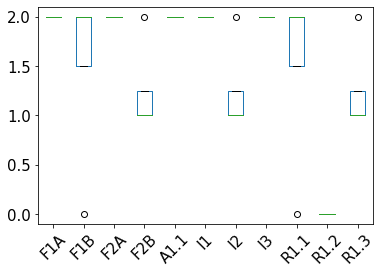

In [7]:
plot = df.boxplot(grid=False, rot=45, fontsize=15)